# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from outliers import smirnov_grubbs as grubbs

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


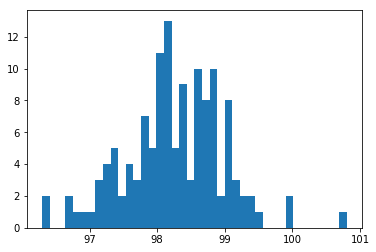

In [55]:
# The distribution of body temperatures in the sample collection
plt.hist(df['temperature'],bins=40)
plt.show()

In [5]:
# Normality test
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

#### Answer 1: 
The p-value of the normality test is high (above 25%), so we cannot reject the null hypothesis that the distribution is normal. Hence, the distribution is most likely normal.

In [72]:
# Number of samples
n_samples = len(df['temperature'])
n_samples

130

#### Answer 2: 
The size of the sample is larger then 30 (130), and therefore large enough to assume that the CLT holds. We have no way to know if the observations are independent, but since the conclusions of the research were published, we can assume that the observations are independent.

In [73]:
# t-test of the mean
pop_mean = 98.6
samp_mean = np.mean(df['temperature'])
samp_std = np.std(df['temperature'])
print 'sample mean: %f' %samp_mean
print stats.ttest_1samp(df['temperature'],popmean=pop_mean)

sample mean: 98.249231
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [74]:
# z-statistic
z_statistic = (samp_mean - pop_mean)/samp_std/np.sqrt(n_samples)
z_statistic

-0.04212250155444705

#### Answer 3: 
The true population mean is in fact not 98.6F according to the sample we have. I performed a one-sample t-test, since I have only one sample, and I am trying to determine if the population mean is in fact 98.6F. The p-value < 0.0000003 so we can reject the null hypothesis that the population mean temperature is 98.6F. I used the t-statistic, because I don't have the standard deviation of the temperature in the population. When I performed a z-test, using the sample standard deviation as an estimate for the population standard deviation, I get a statistic of -0.042, so I cannot reject the null hypothesis, because the statistic is smaller then 1.96 in absolute value, which is the threshold for rejecting the null hypothesis on a two tailed z-test, with a 5% significance level.

In [75]:
# The margin of error for a 95% confidence interval
se = samp_std/np.sqrt(n_samples)
margin_of_error = se*2
margin_of_error

0.12811322939038672

In [76]:
# A 95% confidence interval of the mean
conf_int = [samp_mean - margin_of_error,samp_mean + margin_of_error]
conf_int

[98.121117539840384, 98.377343998621171]

In [78]:
# The normal range
norm_range = [samp_mean - 3*samp_std, samp_mean + 3*samp_std]
norm_range

[96.05815743251567, 100.44030410594588]

In [17]:
# Sorted values of body temperatures
df['temperature'].sort_values()

125     96.3
39      96.4
11      96.7
105     96.7
95      96.8
42      96.9
106     97.0
85      97.1
93      97.1
49      97.1
43      97.2
123     97.2
18      97.2
109     97.3
46      97.4
65      97.4
47      97.4
78      97.4
66      97.4
124     97.5
82      97.5
59      97.6
104     97.6
79      97.6
31      97.6
71      97.7
120     97.7
126     97.7
117     97.8
90      97.8
       ...  
7       98.8
92      98.8
56      98.8
110     98.8
73      98.8
15      98.8
75      98.8
80      98.8
98      98.8
69      98.9
50      98.9
122     99.0
114     99.0
44      99.0
100     99.0
74      99.0
60      99.1
113     99.1
36      99.1
5       99.2
83      99.2
3       99.2
0       99.3
34      99.3
103     99.4
19      99.4
35      99.5
96      99.9
91     100.0
116    100.8
Name: temperature, dtype: float64

In [30]:
# Sorted values of body temperatures after filtering outliers using grubbs algorithm
grubbs.test(df['temperature'], alpha=0.05).sort_values()

125     96.3
39      96.4
11      96.7
105     96.7
95      96.8
42      96.9
106     97.0
85      97.1
93      97.1
49      97.1
43      97.2
123     97.2
18      97.2
109     97.3
46      97.4
65      97.4
47      97.4
78      97.4
66      97.4
124     97.5
82      97.5
59      97.6
104     97.6
79      97.6
31      97.6
71      97.7
120     97.7
126     97.7
117     97.8
90      97.8
       ...  
98      98.8
10      98.8
7       98.8
80      98.8
92      98.8
75      98.8
56      98.8
73      98.8
110     98.8
15      98.8
50      98.9
69      98.9
74      99.0
114     99.0
44      99.0
100     99.0
122     99.0
113     99.1
36      99.1
60      99.1
5       99.2
83      99.2
3       99.2
0       99.3
34      99.3
103     99.4
19      99.4
35      99.5
96      99.9
91     100.0
Name: temperature, dtype: float64

#### Answer 4: 
If we use the Grubbs test on the data, in order to detect outliers, we get that only one sample is considered an outlier (100.8). In normal distribution, 99.7% of the data is within a range of 3 standard deviations from the mean of the distribution, so if we use this logic, an abnormal temperature would be a temperature outside the range of [96.06, 100.44].

In [79]:
males_temp = df['temperature'][df['gender'] == 'M']
females_temp = df['temperature'][df['gender'] == 'F']
print 'mean males temperature: %f' %np.mean(males_temp) 
print 'mean females temperature: %f' %np.mean(females_temp)

mean males temperature: 98.104615
mean females temperature: 98.393846


In [81]:
# Two samples t-test
print stats.ttest_ind(males_temp,females_temp)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


#### Answer 5: 
In order to test if there is a significant difference between males and females in normal temperature, I did a two samples t-test, between the females samples and the males samples, under the hypothesis that males and females have the same body temperature. I got a p-value < 0.024 which means that we can reject the null hypothesis, and determine that according to the sample we have, there is a difference between males and females in their body temperature. It worth mentioning that the means of males and females normal temperatures, are numerically close, and the p-value is fairly close to the threshold for rejecting the null hypothesis, so it might be a good idea to add more samples, in order to determine with a greater amount of confidence, that the means are different.